# Unsupervised Lab Session 04

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [3]:
data = "./marketing.csv"
df = pd.read_csv(data)


In [4]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


In [7]:
# Alternatively
missing_percentage = df.isnull().sum() / len(df)
print(missing_percentage)


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


In [8]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [9]:
df.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [10]:
len(df[df.duplicated()])


0

# There are no duplicate records in the dataset

### 5. Drop the columns which you think redundant for the analysis 

In [11]:
df = df.drop(columns=['ID', 'Dt_Customer'], axis=1)

In [12]:
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [13]:
df['Marital_Status'].value_counts()


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [15]:
df['Marital_Status'].value_counts()


Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [16]:
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Expenses']


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

In [17]:
# ALternatively
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Expenses']


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [18]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases']


0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: NumTotalPurchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [19]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [20]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['TotalAcceptedCmp']


0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [21]:
columns_to_drop = [
    # Columns used for 'Total_Expenses'
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    # Columns used for 'Num_Total_Purchases'
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases',
    'Kidhome', 'Teenhome',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'
]

In [22]:
df_cleaned = df.drop(columns=columns_to_drop, axis=1)
df_cleaned.head()


,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [23]:
from datetime import datetime

current_year = datetime.now().year

In [24]:

# Extract 'age' by subtracting 'Year_Birth' from the current year
df_cleaned['Age'] = current_year - df_cleaned['Year_Birth']

In [25]:
df_cleaned = df_cleaned.drop(columns=['Year_Birth'], axis=1)
df_cleaned.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43


### 13. Encode the categorical variables in the dataset

In [26]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
categorical_columns

Index(['Education', 'Marital_Status'], dtype='object')

In [27]:
dfc = df_cleaned.copy()


In [28]:
dfo = dfc.copy()


In [29]:
lbl = LabelEncoder()
for i in categorical_columns:
    dfo[i] = dfo[[i]].apply(lbl.fit_transform)


In [30]:
dfo.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,7,0,1617,25,0,1,67
1,2,0,46344.0,38,5,0,27,6,2,0,70
2,2,1,71613.0,26,4,0,776,21,0,0,59
3,2,1,26646.0,26,6,0,53,8,1,0,40
4,4,1,58293.0,94,5,0,422,19,1,0,43


### 14. Standardize the columns, so that values are in a particular range

In [31]:
# Standardization
dfn = dfo.copy()
scaled_features = StandardScaler().fit_transform(dfn.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dfn.index, columns=dfn.columns)

In [32]:
scaled_features_df.head()


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [33]:
# Apply PCA
pca = PCA()
pca.fit(scaled_features_df)

PCA()

In [34]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [35]:
# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

In [36]:
# Find the number of components that explain 90% to 95% variance
components_90_95 = (cumulative_variance >= 0.90) & (cumulative_variance <= 0.95)

In [37]:
# Determine the number of components required to explain 90-95% of variance
num_components_90_95 = (cumulative_variance <= 0.95).sum()

In [38]:
# Print the explained variance and the number of components required
print(f"Explained Variance Ratios: {explained_variance_ratio}")
print(f"Cumulative Explained Variance: {cumulative_variance}")
print(f"Number of components explaining 90-95% of variance: {num_components_90_95}")

Explained Variance Ratios: [0.28990631 0.11427867 0.09773866 0.09240105 0.0907042  0.08020824
 0.07404694 0.06368829 0.0522283  0.03035301 0.01444633]
Cumulative Explained Variance: [0.28990631 0.40418499 0.50192365 0.59432469 0.6850289  0.76523713
 0.83928407 0.90297236 0.95520066 0.98555367 1.        ]
Number of components explaining 90-95% of variance: 8


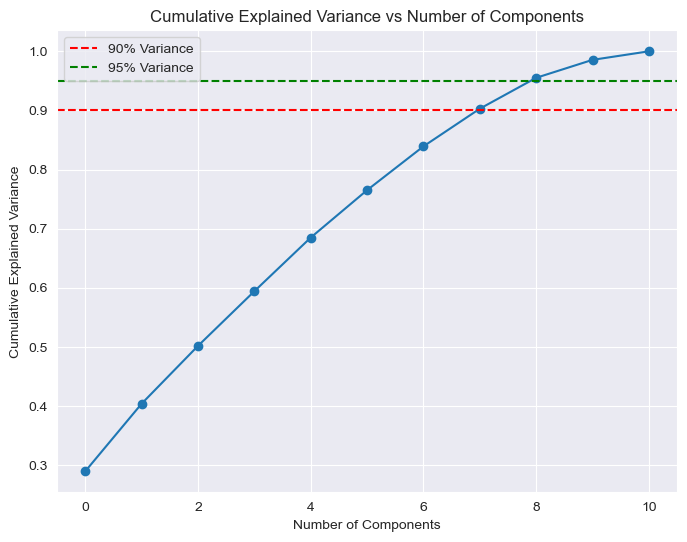

In [39]:
# Plot the explained variance to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

# Alternatively


In [40]:
# Alternatively
# Standardization
dfg = dfo.copy()
scaled_features = StandardScaler().fit_transform(dfg.values)
scaled_features_df = pd.DataFrame(scaled_features, index=dfg.index, columns=dfg.columns)

In [41]:
scaled_features_df.head()


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,-0.350141,0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.428354,0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761


In [42]:
cov_matrix = np.cov(scaled_features_df.T)
cov_matrix


array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.04029882,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972,  0.00344176,
        -0.00520466, -0.01775232,  0.00671037,  0.03917598, -0.06004206,
        -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.55006966,
        -0.02723528,  0.66500337,  0.5636214 , -0.29084155,  0.28717443,
         0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663, -0.02145427,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.04029882,  0.00344176, -0.55006966, -0.02145427,  1.00044663,
         0.01977734, -0.50044131, -0.31242795,  0.41860616, -0.12836726,
        -0.12119336],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  0.01977734,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [43]:
eigen_vals, eigen_vectors = np.linalg.eig(cov_matrix)
print(eigen_vals)
print(eigen_vectors)


[3.19039372 0.15898065 0.33403219 1.25762686 0.57476787 0.70088408
 0.81488009 0.88268465 1.07560545 0.99819186 1.01686548]
[[-8.10878879e-02  1.28355184e-02  2.36293947e-02  5.51249544e-01
   9.44095922e-02  1.09410621e-01  6.91170717e-01 -2.13981881e-01
   3.53512225e-01  1.33215293e-01  4.14647769e-02]
 [ 1.66012105e-02  5.44320001e-04  2.67214391e-03  7.24616823e-02
   9.22507506e-03 -1.59630615e-01  9.75252262e-02 -2.48006969e-01
  -2.93241983e-01 -5.20771188e-01  7.35314297e-01]
 [-4.53880338e-01  1.10208189e-01 -7.33626969e-01  1.11676478e-01
  -4.01003018e-01  2.33850859e-01 -3.55906464e-02  8.23323221e-02
  -7.12476789e-02 -3.27656138e-02  3.84949439e-02]
 [ 4.86396555e-03  3.74604574e-02 -1.76527197e-02  1.12971535e-01
  -4.88116231e-02 -1.39195279e-01  2.76319114e-02 -4.78177475e-01
  -6.57510164e-01  5.43205810e-01 -8.32561223e-02]
 [ 3.78658345e-01 -9.89489261e-02 -5.23256954e-01  3.88425153e-02
   4.48112460e-01  8.25533630e-02 -2.94912266e-01 -4.57654180e-01
   2.4727379

In [44]:
total = sum(eigen_vals)
var_exp = [(i/total)*100 for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)


[28.990631201030737, 11.427867418203071, 9.773866099738886, 9.240104772844973, 9.070420346680981, 8.020823626792367, 7.4046936912404755, 6.368828985843821, 5.222829816381424, 3.0353006494361603, 1.4446333918071033]
[ 28.9906312   40.41849862  50.19236472  59.43246949  68.50288984
  76.52371347  83.92840716  90.29723614  95.52006596  98.55536661
 100.        ]


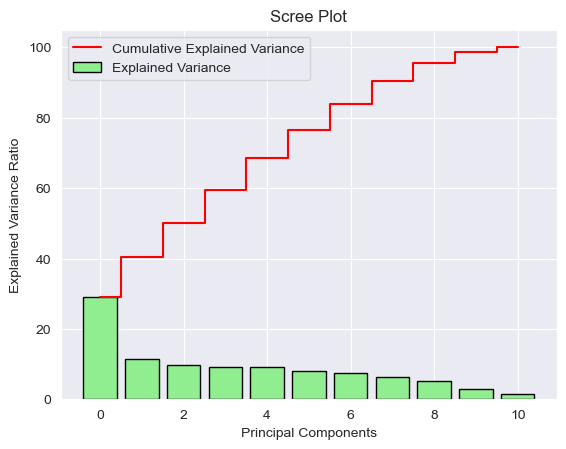

In [45]:
# Scree plot
plt.bar(range(len(var_exp)), var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [46]:
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8'])
pca_df


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316
...,...,...,...,...,...,...,...,...
2235,0.831475,0.110515,0.519756,-0.672597,0.442564,0.097924,-0.440110,0.402803
2236,-0.195483,3.373427,-0.582772,-0.309149,0.549594,-1.190443,-1.099340,0.178087
2237,1.220056,-1.376771,0.360039,1.028571,-1.556985,-1.036379,-0.026042,0.155661
2238,1.318425,1.180979,-0.358801,-0.777616,1.109703,1.217594,-0.057497,0.381280


In [47]:
# K-Means Clustering
cluster_errors = []
cluster_range = range(2, 15)
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)


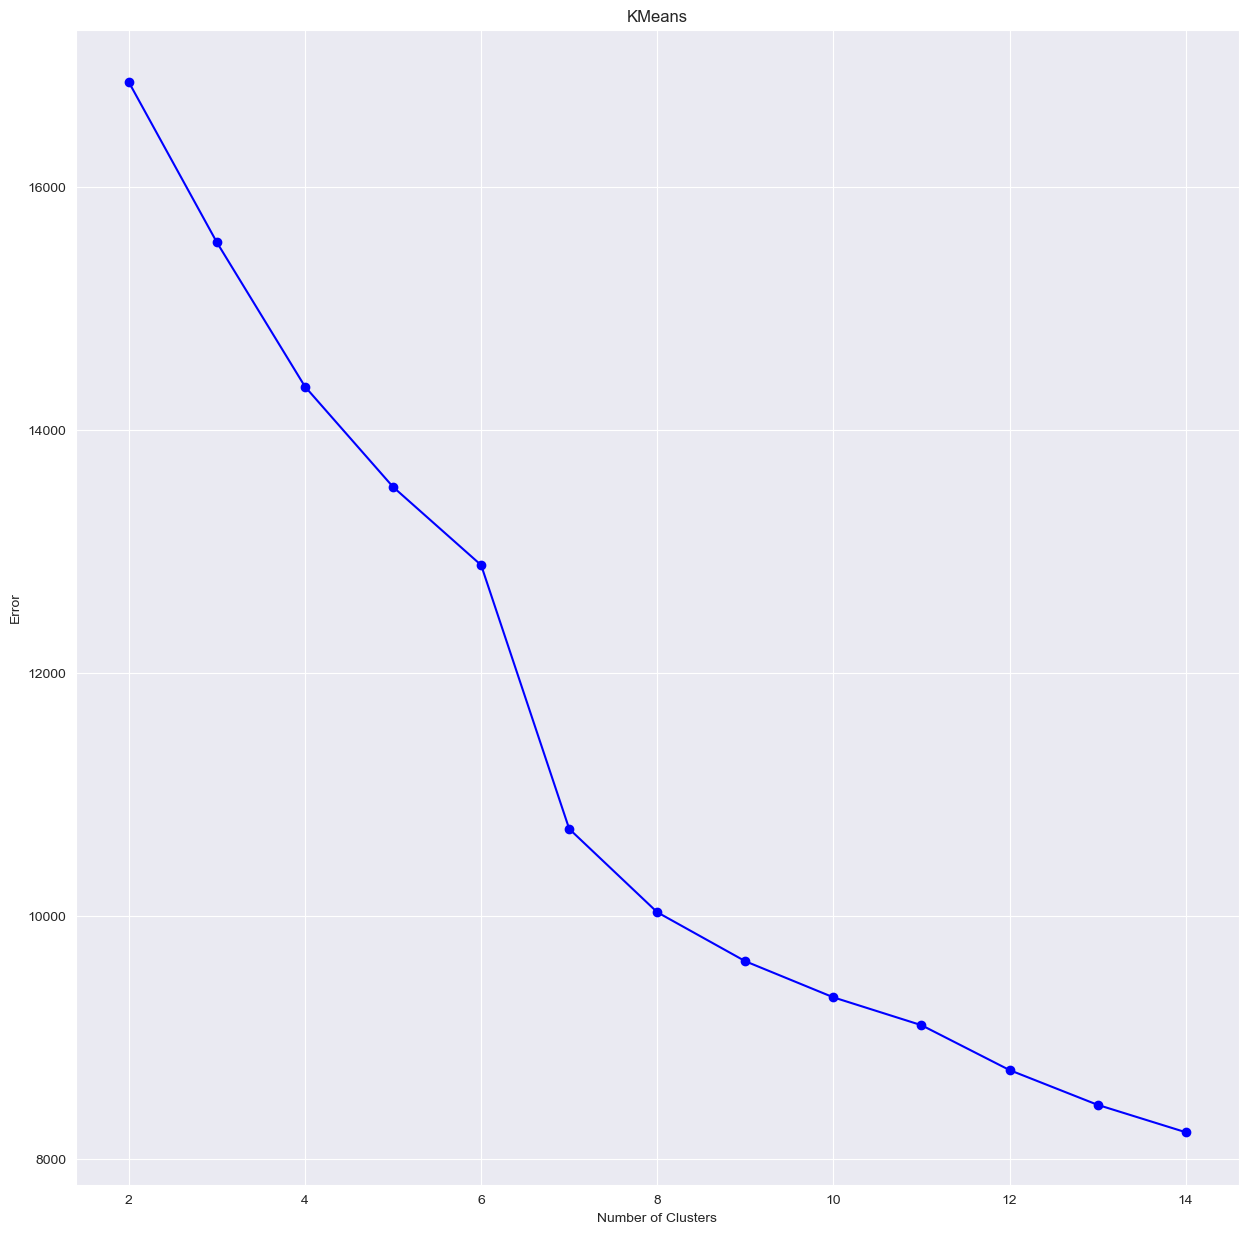

In [48]:
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})
plt.figure(figsize=(15, 15))
plt.title('KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()


In [49]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)


KMeans(n_clusters=3, random_state=100)

In [50]:
labels = pd.DataFrame(kmeans.labels_, columns=['label'])

In [51]:
kmeans_df = pca_df.join(labels)
kmeans_df.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,label
0,1.956902,-0.081936,-0.344667,1.193687,-0.696970,-0.299137,-1.145041,-0.358094,1
1,-1.512598,1.000666,-0.367106,1.006953,-0.445000,1.371965,-0.724374,-0.346359,0
2,1.314538,-0.299417,0.296366,-0.764913,0.732877,0.984394,0.025389,0.058563,1
3,-1.755094,-1.139847,-0.254499,-0.825065,0.579217,0.221975,0.562426,0.239541,2
4,0.063584,0.571435,0.902243,-0.757574,-0.794825,-1.241683,1.325626,0.898316,0


In [52]:
kmeans_df['label'].value_counts()


label
2    795
0    753
1    692
Name: count, dtype: int64

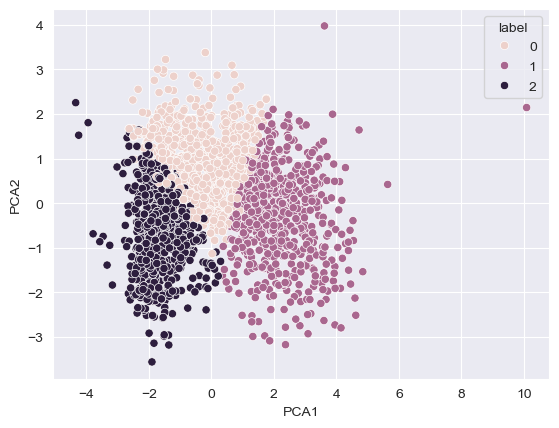

In [53]:
sns.scatterplot(data=kmeans_df, x='PCA1', y='PCA2', hue='label')
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

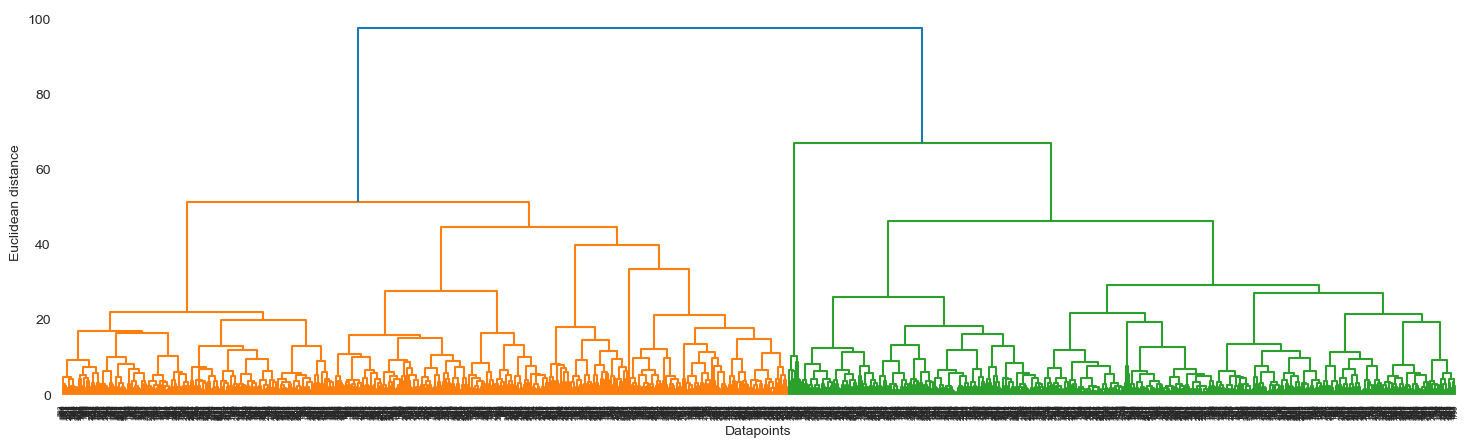

In [54]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [55]:
from sklearn.metrics import silhouette_score


In [56]:
for i in range(2, 15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i, silhouette_score(scaled_features_df, labels))


2 0.19083932398841263
3 0.19859065923121116
4 0.11245037433445754
5 0.1142462175685332
6 0.13181821517770267
7 0.13957002140192074
8 0.1390706310270007
9 0.11337088108590954
10 0.11192131225156017
11 0.10382081162153395
12 0.10893099764800893
13 0.1023394958833542
14 0.09549869159604249


In [57]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [58]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [59]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)
df_hier = dfc.join(df_label1)

In [62]:
df_hier.head()


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67,0
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70,1
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59,0
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40,1
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43,0


### Visualization and Interpretation of results

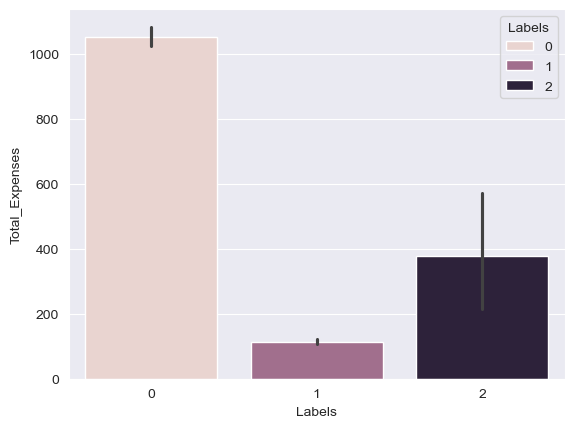

In [63]:
sns.barplot(x=df_hier['Labels'], y=df_hier['Total_Expenses'], hue=df_hier['Labels'])
plt.show()

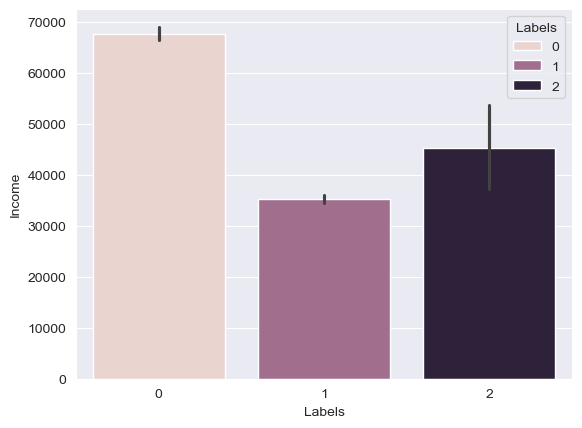

In [73]:
sns.barplot(
    x=df_hier['Labels'],
    y=df_hier['Income'],
    hue=df_hier['Labels'],
    data=df_hier
)
plt.show()

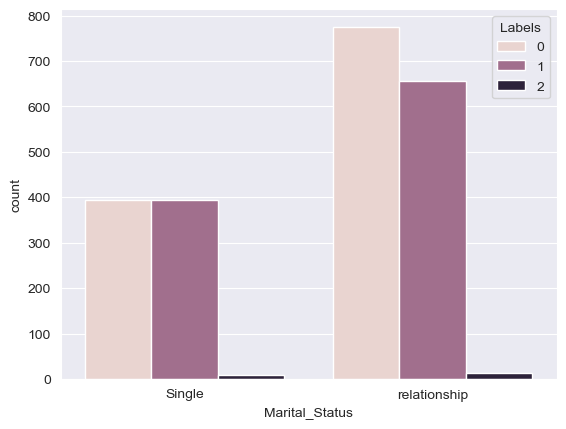

In [75]:
sns.countplot(
    #x=df_hier['Labels'],
    x=df_hier['Marital_Status'],
    hue=df_hier['Labels'],
    data=df_hier
)
plt.show()

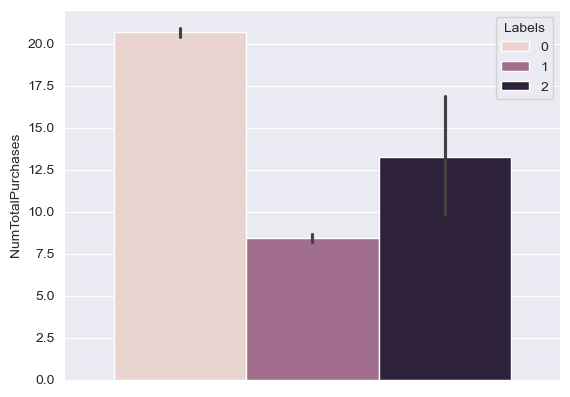

In [77]:
sns.barplot(hue=df_hier['Labels'], y=df_hier['NumTotalPurchases'], data=df_hier)
plt.show()

- We can conclude that the customers belong to cluster 0 does maximum purchases, has spend maximum amount and have maximum income.
- Where customers belong to cluster 1 has the least Total_expenses, minimum balance and does mimimum purchases compared to other two clusters.
- Customers belong to cluster 2 does average purchases, has average income.

-----
## Happy Learning
-----